<img src="logo_su.png" width="240" height="240" align="center"/>

<h1><center>Traitement du signal numérique</center></h1> 

<h1><center> Examen de TP</center></h1> 

# Consignes

- le travail est à faire **seul**,
- les fichiers nécessaires pour faire ce TP sont disponibles sur Moodle,
- pour chaque figure, on prendra soin de bien indiquer les axes et unités si précisées,

A l'issu du temps imparti, vous devez déposer sur Moodle, dans l'espace de dépôt qui vous est accessible :
  - un export PDF : **File -> Print Preview**, puis **menu ... -> Imprimer -> Enregistrer au format PDF**
  - un export python : **File -> Download As... -> Notebook (.ipynb)**

# <span style='color:red'> A COMPLETER : </span>

- NOM : Dechicha  
- Prénom : Mehdi
- Parcours : Sar groupe A
- Numéro étudiant : 3700500

## Présentation du problème

On souhaite réaliser un dispositif permettant de reconnaître automatiquement une sirène de véhicule d'urgence à partir d'un enregistrement audio. Les sirènes de véhicules d'urgence sont construites sur le même modèle : deux
fréquences sont émises en alternance (chacune pendant 0.5s). On note $f_0$ la première fréquence et $f_1$ la deuxième fréquence. La première fréquence $f_0$ est commune à toutes les sirènes. Le tableau ci-dessous récapitule les valeurs théoriques des fréquences associées à chaque sirène, dans la réalité, les valeurs peuvent être légèrement décalées.


| Sirène   | Fréquence $f_0$ (Hz) | Fréquence $f_1$ (Hz) |
| :------- |:----------------:| :---------------:|
| Police   |   435            |  580             |
| Pompier  |   435            |  488             |
| Samu     |   435            |  651             |
| Gendarme |   435            |  732             |

## Initialisation du notebook

In [45]:
# NE PAS MODIFIER CETTE CELLULE
%matplotlib notebook
import numpy as np
import pylab as plt
from scipy.io.matlab import mio
import filtres as tns
from IPython.display import display, Audio

## 1/ Analyse en temps et en fréquence du signal de sirène

Le signal est contenu dans la variable `x` de dimension `N`, acquis à la fréquence d'échantillonnage `Fe`. L'unité de `x` est arbitraire.

In [46]:
# NE PAS MODIFIER CETTE CELLULE
data = mio.loadmat('signalG.mat')
x = np.array(data['x'])[0]
Fe = int(np.array(data['fs'])[0])
N = len(x)

In [47]:
print("Fe vaut :" , Fe)

Fe vaut : 50000


#### 1.1 Construire le vecteur `t` qui contient les `N` valeurs de temps auxquelles ont été acquises les valeurs du signal `x`.<span style='color:red'> 1 pt </span>

<IPython.core.display.Javascript object>


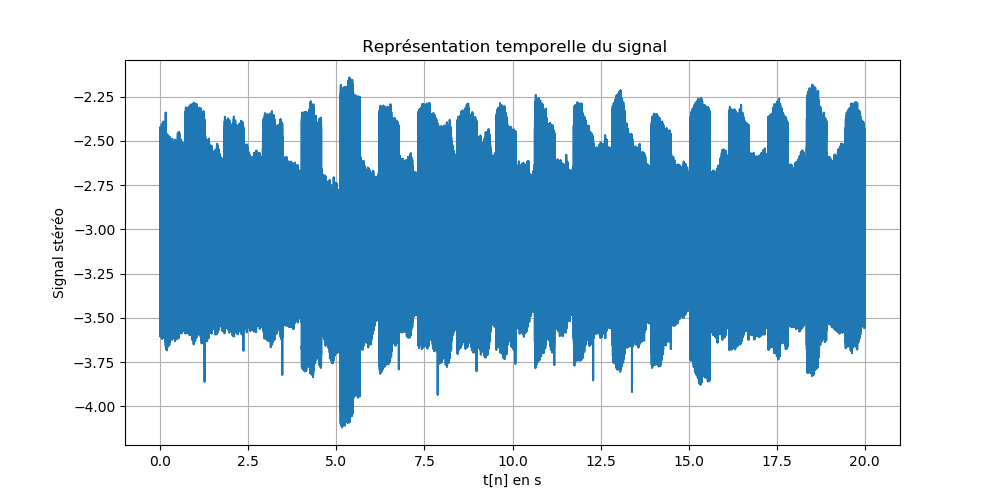

In [48]:
Te = 1/Fe
t = np.arange(0, N*Te, Te)
plt.figure(figsize=(10,5))
plt.plot(t,x)
plt.xlabel('t[n] en s')
plt.ylabel('Signal stéréo')
plt.title(u'\n Représentation temporelle du signal')
plt.grid()
plt.show() 

Commentaire : On remarque un signal bruité

#### 1.2 Tracer l'évolution temporelle du signal sur une durée de 2s.<span style='color:red'> 2 pt </span>

<IPython.core.display.Javascript object>


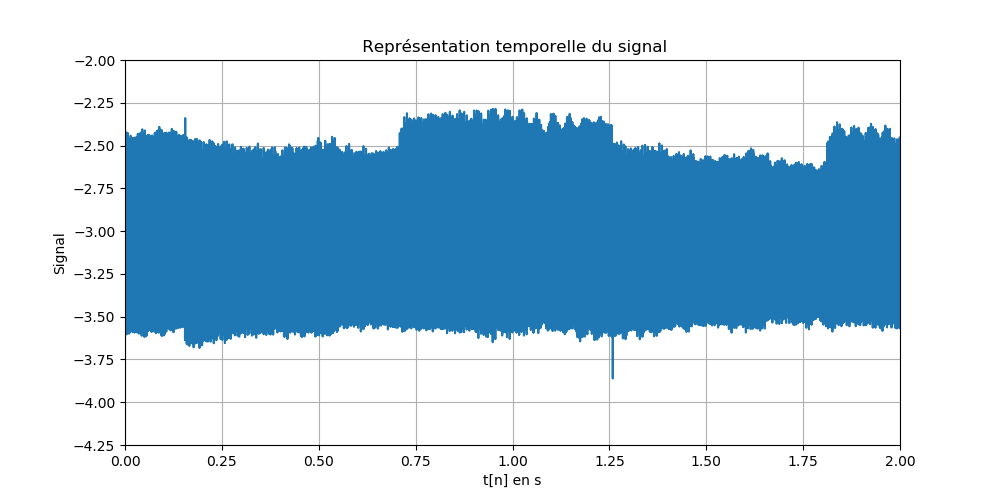

In [78]:
Te = 1/Fe
t = np.arange(0, N*Te, Te)
plt.figure(figsize=(10,5))
plt.plot(t,x)
plt.xlabel('t[n] en s')
plt.ylabel('Signal')
plt.title(u'\n Représentation temporelle du signal')
plt.grid()
plt.axis((0,2,-4.25, -2))
plt.show() 

#### 1.3 Quelle est la valeur moyenne du signal ? Quelle sera la conséquence de cette valeur moyenne sur le spectre du signal ?<span style='color:red'> 1 pt </span>

In [51]:
Val_moy = np.mean(x)
print("La valeure moyenne vaut :" , Val_moy)

La valeure moyenne vaut : -3.1416204903157654


Commentaire : présence donc d'un offset dans le signal , la conséquence sur le spectre sera l'apparition d'un pic de dirac en 0 ( d'amplitude égale à l'offset lorsqu'on le representera graphiquement sur papier , mais pas dans la réalité)

#### 1.4 Construire le vecteur des fréquences (on le notera f) et tracer la TFD du signal en fonction de la fréquence. Commenter. Quelle fréquence d’échantillonnage minimale aurait-on pu choisir ? Justifier. <span style='color:red'> 2 pt </span>

<IPython.core.display.Javascript object>


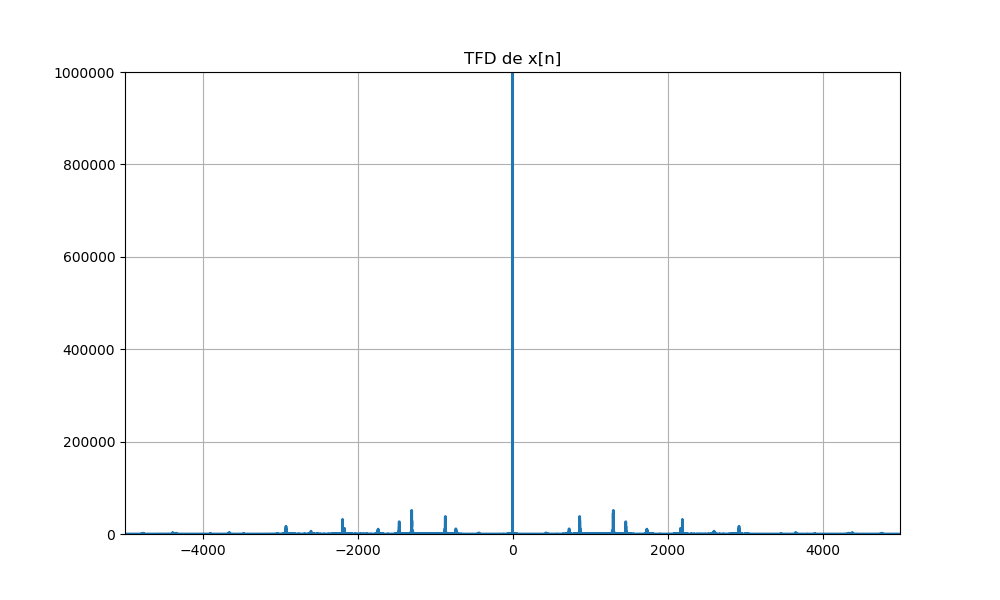

In [52]:
f = np.fft.fftfreq(N, 1/Fe) # Vecteur fréquence
plt.figure(figsize=(10,6))
# Tracé de la FFT 
x_f = np.fft.fft(x) # Transformée de fourier
plt.plot(np.fft.fftshift(f),abs(np.fft.fftshift(x_f)), lw=2)
plt.title('TFD de x[n]'); plt.grid()
lim = 5000
plt.axis((-lim,lim,0, 1e6));

Commentaire : L'impulsion de dirac en 0 est bien présente . 
Concernant la fréquence d'echantillonage minimale , elle correspond d'apres shannon à 2*Fmax avec Fmax la frequence max dans la bande passante.
On peut définir Fmax comme égale à 3000 Hz

#### 1.5 Retrouve-t'on à partir du spectre exactement la valeur moyenne du signal ? Justifier.<span style='color:red'> 2 pt </span>

Commentaire : Pas vraiment puisqu'en réalité l'impulsion de dirac a une amplitude quasi infinie , la seule information que ce pic donne est qu'il y'a bien presence d'un offest donc d'une valeure moyenne non nulle 

#### 1.6 Tracer l'évolution de la phase du spectre en fonction de la fréquence. On limitera la représentation à l'intervalle [0:1500]Hz. Quelle est la valeur de la phase en $f=0$Hz ? Qu'en déduisez vous par rapport à la réponse à la question 7 ? <span style='color:red'> 1 pt </span>

<IPython.core.display.Javascript object>


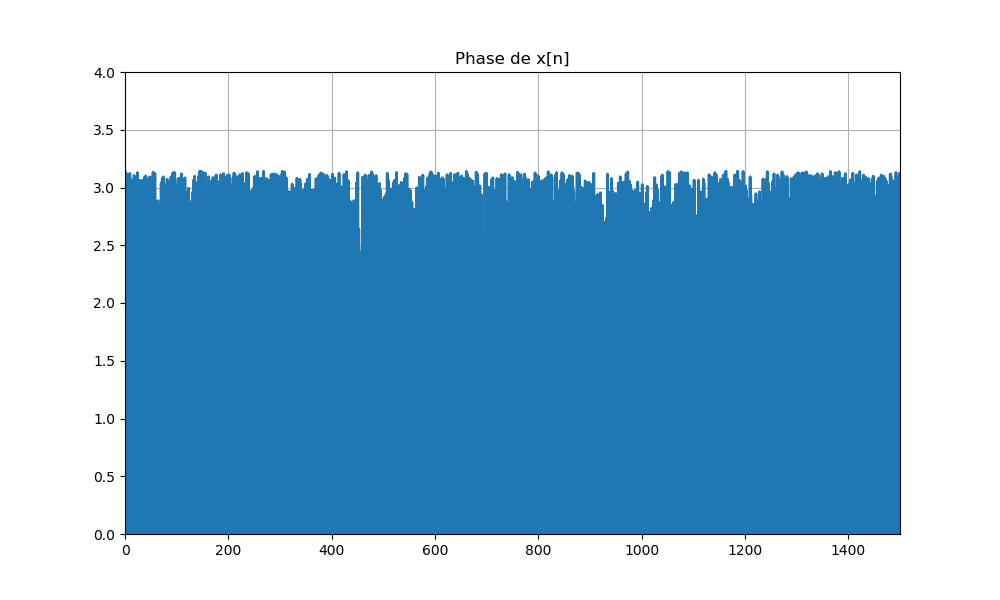

In [53]:
f = np.fft.fftfreq(N, 1/Fe) # Vecteur fréquence
plt.figure(figsize=(10,6))
# Tracé de la FFT 
x_f = np.fft.fft(x) # Transformée de fourier
plt.plot(np.fft.fftshift(f),np.angle(np.fft.fftshift(x_f)), lw=2)
plt.title('Phase de x[n]'); plt.grid()
lim = 1500
plt.axis((0,lim,0, 4));

Commentaire : La phase en f=0 vaut 3.81 rad

#### 1.7 Créer le signal `xc` correspondant au signal `x` ***centré***. Tracer le spectre du signal `xc` en limitant le tracé à l'intervalle [0; 3000] Hz. Quelles sont les deux premières fréquences non négligeables du signal ? <span style='color:red'> 2 pt </span>

<IPython.core.display.Javascript object>


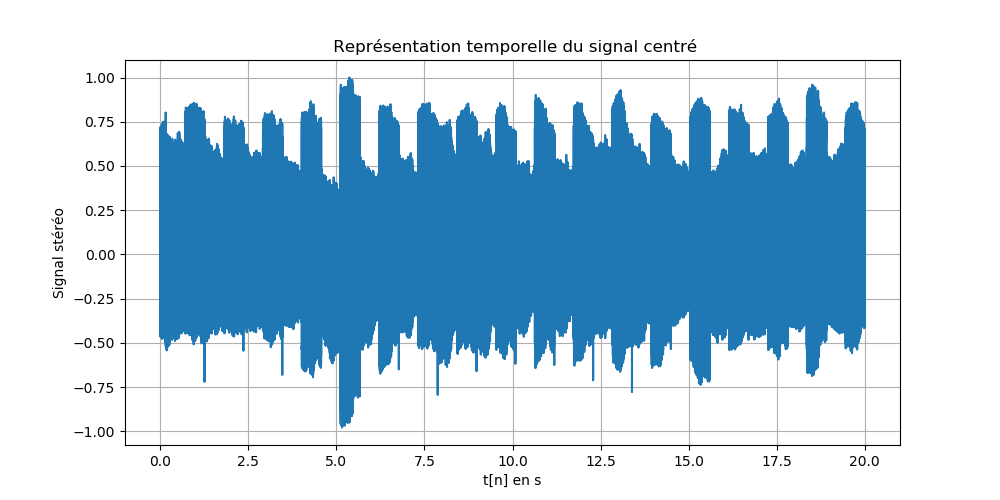

In [89]:
Te = 1/Fe
xc = x - Val_moy
t = np.arange(0, N*Te, Te)
plt.figure(figsize=(10,5))
plt.plot(t,xc)
plt.xlabel('t[n] en s')
plt.ylabel('Signal stéréo')
plt.title(u'\n Représentation temporelle du signal centré')
plt.grid()
plt.show() 

<IPython.core.display.Javascript object>


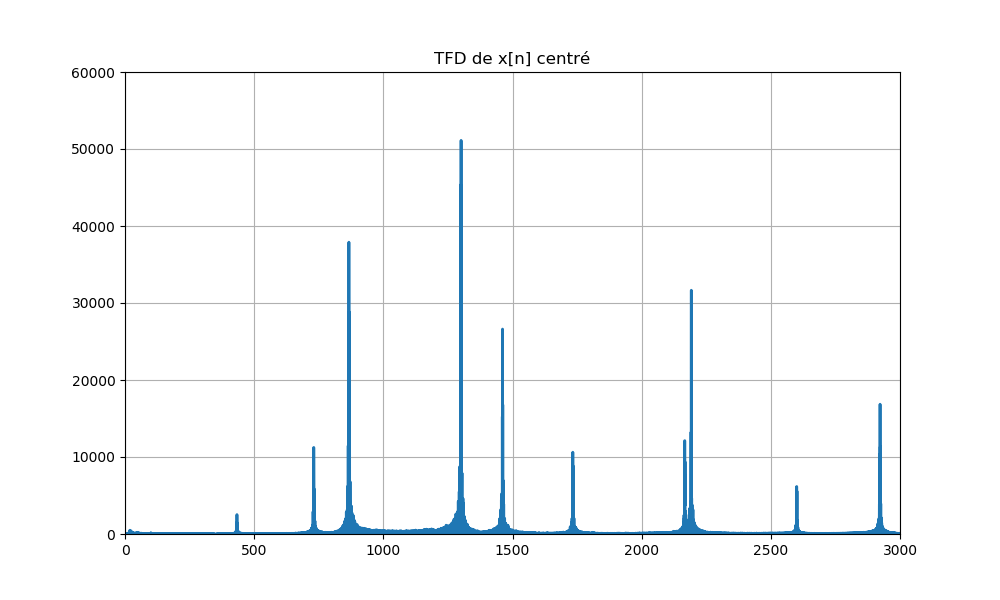

In [55]:
# Spectre : 

f = np.fft.fftfreq(N, 1/Fe) # Vecteur fréquence
plt.figure(figsize=(10,6))
# Tracé de la FFT 
x_f2 = np.fft.fft(xc) # Transformée de fourier
plt.plot(np.fft.fftshift(f),abs(np.fft.fftshift(x_f2)), lw=2)
plt.title('TFD de x[n] centré'); plt.grid()
lim = 3000
plt.axis((0,lim,0, 60*1e3));



Commentaire : Les deux premières fréquences non négligeables de ce signal sont : 435Hz et 730 Hz

#### 1.8 Retrouver sur le signal temporel les 2 fréquences déterminées précédemment.  A quelle sirène ce signal correspond-il ? <span style='color:red'> 1 pt </span>

Commentaire :La sirène correspond à une sirène de gendarme 

#### 1.9 Donner les valeurs approximatives des fréquences associées aux pics apparaissant après les deux premières fréquences sur le signal centré. A quoi sont-ils dus ? <span style='color:red'> 1 pt </span>

Commentaire :

## 2/ Filtrage du signal


Dans cette partie on veut filtrer le signal d'origine grâce à l'outil de synthèse de filtre utilisé dans le TP 2 **pour ne supprimer que les pics apparaissant après les 2 premières fréquences**.  

<IPython.core.display.Javascript object>


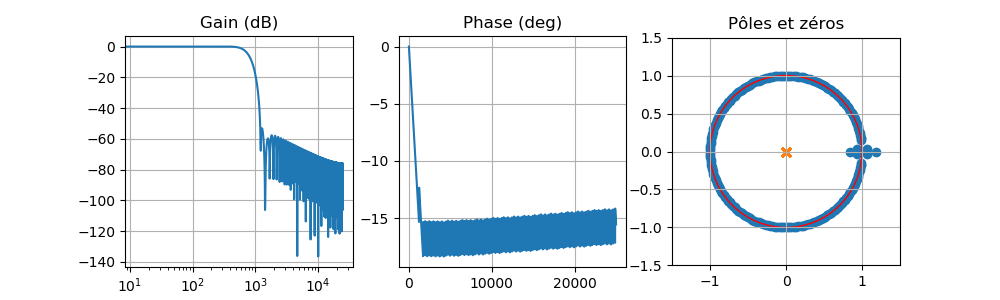

Résumé : Nature RIF type:Passe-Bas ordre:10 parametres: 800
Résumé : Nature RIF type:Passe-Bas ordre:200 parametres: 800


In [56]:
# NE PAS MODIFIER LA CELLULE
FILTRE = tns.filtre()
fig, ax = plt.subplots(1,3,figsize=(10,3))
FILTRE.display(ax, fig)

#### 2.1 Quel type de filtre faut-il choisir ? Quelle fréquence de coupure faut-il utiliser ? Préciser l'ensemble des paramètres du gabarit du filtre que vous souhaitez synthétiser. <span style='color:red'> 1 pt </span>

Commentaire : On peut choisir un filtre RIF passe bas de fréquence de coupure Fc valant 800 Hz , d'ordre élevé pour etre assez effiace (l'avantage d'un RII étant qu'il ne necessite pas forcement un ordre élevé tel que le RIF). Le rif aura l'avantage d'avoir une phase linéaire à un certain endroit de la bande passante

#### 2.2 Utiliser ce filtre sur le signal de sirène ***centré***. Commenter l'allure du signal ainsi obtenu, en particulier son amplitude, comparativement au signal d'origine. <span style='color:red'> 2 pt </span>

<IPython.core.display.Javascript object>


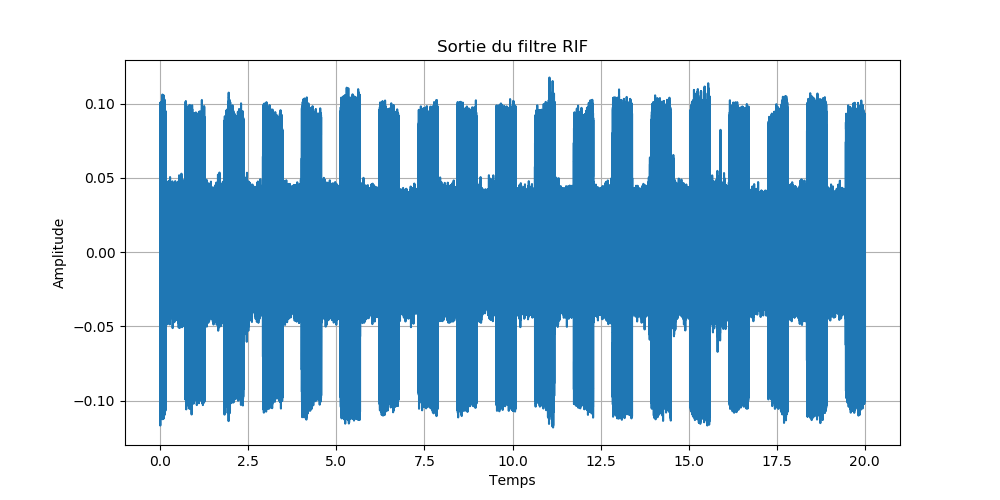

In [57]:
n,x_rif = FILTRE.filter(xc)
plt.figure(figsize=(10,5))
plt.step(t, x_rif)
plt.xlabel('Temps')
plt.ylabel('Amplitude')
plt.title(u'Sortie du filtre RIF')
plt.grid()

Commentaire :

#### 2.3 Le résultat obtenu vous semble-t-il cohérent ? Vérifier l'efficacité du filtrage en analysant le signal de sortie. <span style='color:red'> 1 pt </span>

<IPython.core.display.Javascript object>


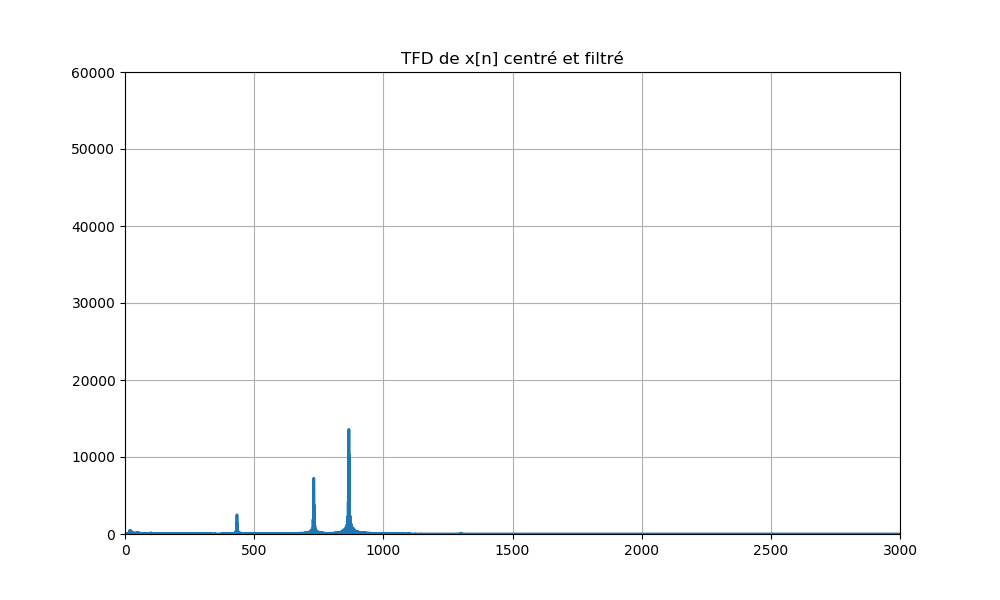

In [58]:
f = np.fft.fftfreq(N, 1/Fe) # Vecteur fréquence
plt.figure(figsize=(10,6))
# Tracé de la FFT 
x_f3 = np.fft.fft(x_rif)
# Transformée de fourier
plt.plot(np.fft.fftshift(f),abs(np.fft.fftshift(x_f3)), lw=2)
plt.title('TFD de x[n] centré et filtré'); plt.grid()
lim = 3000
plt.axis((0,lim,0, 60*1e3));

Commentaire :Avec un ordre très elevé le filtrage est idéal , par exemple dans le cas ou l'odre vaut 200 

## 3/ Analyse des harmoniques


Dans cette partie on veut implémenter un filtre idéal dans le domaine de Fourier qui va éliminer les 2 fréquences $f_0$ et $f_1$ du signal de sirène pour ne conserver que les harmoniques. L'équation de la réponse en fréquences du filtre est : 

\begin{equation}
W(f) = \begin{cases}
0 \text{ si $|f| \le f_c$ }\\
1 \text{ si $|f|>f_c$ }
\end{cases}
\end{equation}


#### 3.1 De quel type de filtre s'agit-il ? Quelle fréquence de coupure $f_c$ faut-il utiliser ? <span style='color:red'> 1 pt </span>

In [96]:
# A COMPLETER
fc = 800

Commentaire : Il s'agit donc d'un flitre pass haut

#### 3.2 Le code ci-dessous construit la réponse en fréquence souhaitée dans la variable `W`. Tracer cette réponse pour $f\in[0,3000]$. Justifier la présence de l'instruction `W[np.where(f>Fe-fc)]=0`. <span style='color:red'> 1 pt </span>

In [97]:
# NE PAS MODIFIER LA CELLULE
W = np.ones(len(f))
W[np.where(f<fc)]=0
W[np.where(f>Fe-fc)]=0

<IPython.core.display.Javascript object>


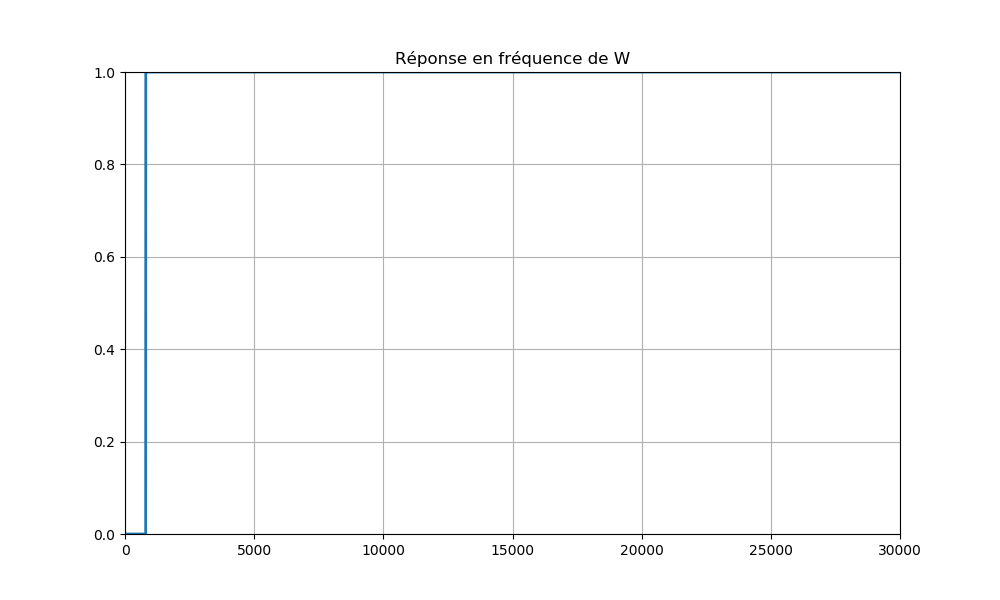

In [99]:
plt.figure(figsize=(10,6))
# Tracé
f = np.dot(Fe/N,[k for k in range(0,N)])
plt.plot(f,W, lw=2)
plt.title('Réponse en fréquence de W'); plt.grid()
plt.axis((0,30000,0, 1));



Commentaire :

#### 3.3 Appliquer ce filtre au spectre du signal centré et tracer le spectre ainsi obtenu en limitant l'intervalle à [0,3000]Hz. <span style='color:red'> 1 pt </span>

<IPython.core.display.Javascript object>


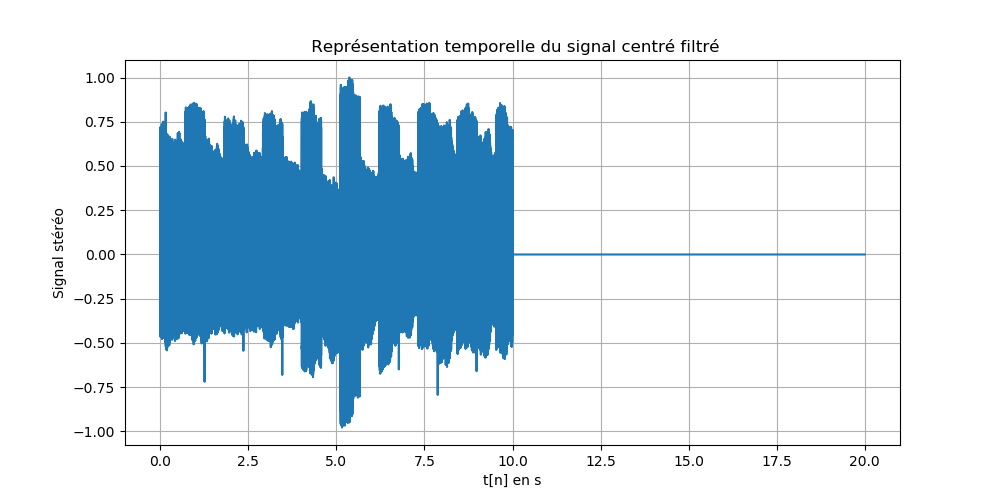

In [82]:
Te = 1/Fe
xc = x - Val_moy
X = xc*W
t = np.arange(0, N*Te, Te)
plt.figure(figsize=(10,5))
plt.plot(t,X)
plt.xlabel('t[n] en s')
plt.ylabel('Signal stéréo')
plt.title(u'\n Représentation temporelle du signal centré filtré')
plt.grid()
plt.show() 

<IPython.core.display.Javascript object>


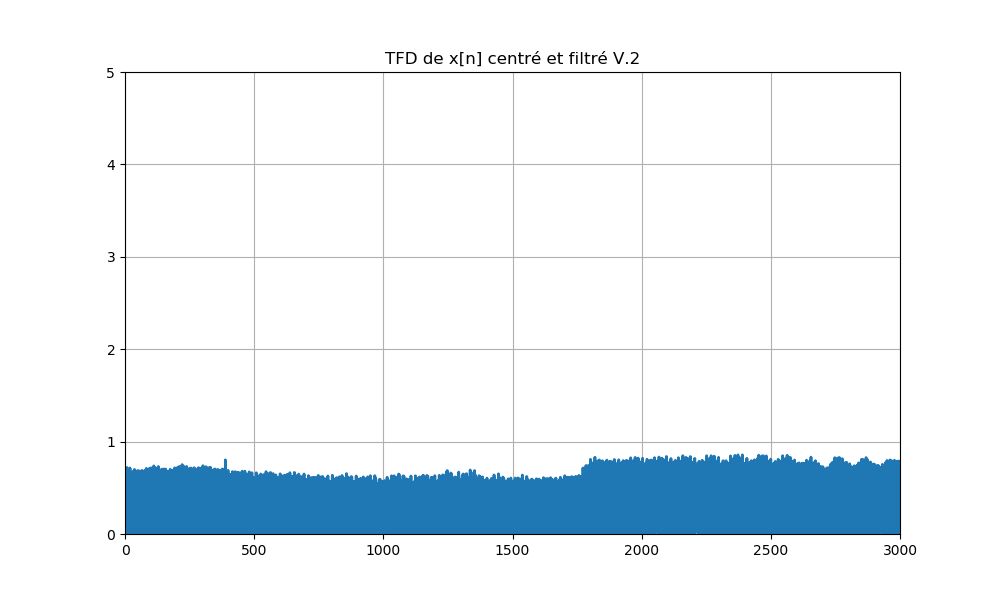

(0, 3000, 0, 5)

In [88]:
f = np.fft.fftfreq(N, 1/Fe) # Vecteur fréquence
plt.figure(figsize=(10,6))
# Tracé de la FFT 
x_f4 = np.fft.fft(X)
# Transformée de fourier
plt.plot(np.fft.fftshift(f),abs(np.fft.fftshift(X)), lw=2)
plt.title('TFD de x[n] centré et filtré V.2'); plt.grid()
lim = 3000
plt.axis((0,lim,0, 5))

Commentaire :

#### 3.4 Déterminer la transformée de Fourier inverse du signal filtré et tracer son allure temporelle. Commenter. <span style='color:red'> 2 pt </span>

Commentaire :